# <center> Real Estate Price Prediction </center> 

# Column Description

<b>1) area_type </b> = This column describes the area of flat.<br>
<b>2) availability </b> = This column describe whether the flat is in ready posession or under construction.<br>
<b>3) location </b> = This column describes the location of flat.<br>
<b>4) size </b> = This column describes the size of flat (in BHK).<br>
<b>5) society </b> = This column describes the name of society.<br>
<b>6) total_sqft </b> = This column describes Total Sqft. of the flat.<br>
<b>7) bath </b> = This column describes No. of Bathrooms in flat.<br>
<b>8) balcony </b> = This column describes No. of Balcony in flat.<br>
<b>9) price </b> = This column describes the price of flat in Lakhs & Crores .<br>

## IMPOTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## READING CSV FILE

In [4]:
data = pd.read_csv('D:\STUDIES\MCA\SEM - 4\Data Science Project\Bengaluru_House_Data.csv')

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
data.shape

(13320, 9)

In [7]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
data2 = data.drop(['area_type','society','balcony','availability',], axis = 'columns')
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Checking null values column wise

In [9]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Droping Null Values

In [10]:
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
data3.shape

(13246, 5)

In [12]:
data.shape

(13320, 9)

In [13]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Creating bhk column 

In [14]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-14-b112e5d732cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Creating function to convert values into float

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
data3[~data3['total_sqft'].apply(is_float)].head(11)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


## Creating function to convert range into numbers

In [19]:
def con_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
con_sqft_to_num('2100 - 2850')

2475.0

In [21]:
data3[:35]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [22]:
data4 = data3.copy()

In [23]:
data4['total_sqft'] = data4['total_sqft'].apply(con_sqft_to_num)

In [24]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [25]:
data4[29:36]

,location,size,total_sqft,bath,price,bhk
29,Electronic City,3 BHK,1025.0,2.0,47.00,3
30,Yelahanka,4 BHK,2475.0,4.0,186.00,4
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.00,3
32,Hebbal,3 BHK,1760.0,2.0,123.00,3
33,Raja Rajeshwari Nagar,3 BHK,1693.0,3.0,57.39,3
34,Kasturi Nagar,3 BHK,1925.0,3.0,125.00,3
35,Kanakpura Road,2 BHK,700.0,2.0,36.00,2


In [26]:
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
data5 = data4.copy()

## Calculating Price per sqft

In [28]:
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
len(data5['location'].unique())

1304

## Grouping Location

In [30]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [31]:
data5['location'].sort_values(ascending = False) 

4586                                          whitefiled
3483                                white field,kadugodi
11013                                      vinayakanagar
5428                                            tc.palya
8816                                            tc.palya
                              ...                       
13245    12th cross srinivas nagar banshankari 3rd stage
1768                                  1 Ramamurthy Nagar
7979                                       1 Immadihalli
459                                         1 Giri Nagar
3853                                   1 Annasandrapalya
Name: location, Length: 13246, dtype: object

In [32]:
len(location_stats[location_stats< 10])

1039

In [33]:
location_lessthan_10 = location_stats[location_stats < 10] 

In [34]:
location_lessthan_10.head(50)

location
Chandra Layout               9
Jakkur Plantation            9
2nd Phase JP Nagar           9
Yemlur                       9
Mathikere                    9
Medahalli                    9
Volagerekallahalli           9
4th Block Koramangala        9
Vishwanatha Nagenahalli      9
B Narayanapura               9
KUDLU MAIN ROAD              9
Ejipura                      9
Vignana Nagar                9
Peenya                       9
Kaverappa Layout             9
Banagiri Nagar               9
Gollahalli                   9
Kamakshipalya                9
Richmond Town                9
Chennammana Kere             9
Lingarajapuram               9
Hoysalanagar                 8
Dodda Nekkundi Extension     8
Jalahalli West               8
Manayata Tech Park           8
Akshayanagara East           8
Akshaya Vana                 8
Basavanapura                 8
Byadarahalli                 8
Kodbisanhalli                8
Dollars Colony               8
Sidedahalli                  8

In [35]:
len(data5.location.unique())

1293

In [36]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_lessthan_10 else x)

In [37]:
len(data5.location.unique())

255

In [38]:
data5[100:110]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
102,Kothanur,3 Bedroom,2400.0,2.0,150.00,3,6250.000000
103,other,2 BHK,1007.0,2.0,43.00,2,4270.109235
104,other,2 BHK,1200.0,2.0,50.00,2,4166.666667
105,other,2 BHK,966.0,2.0,49.90,2,5165.631470
106,Nagarbhavi,3 BHK,1630.0,2.0,98.00,3,6012.269939
107,Rajaji Nagar,3 BHK,1640.0,3.0,229.00,3,13963.414634
108,other,2 BHK,782.0,2.0,55.68,2,7120.204604
109,Devanahalli,2 BHK,1260.0,2.0,66.78,2,5300.000000
110,other,3 BHK,1800.0,3.0,120.00,3,6666.666667
111,other,3 BHK,1413.0,2.0,75.00,3,5307.855626


## Clearing Unusal Data

In [39]:
data5[data5.total_sqft/data5.bhk <= 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
data5.shape

(13246, 7)

In [41]:
data6 = data5[~(data5.total_sqft/data5.bhk < 300)]

In [42]:
data6.shape

(12502, 7)

In [43]:
data6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Creating function to remove outlier from dataset data6

In [44]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
data7 = remove_outlier(data6)
data7.shape

(10222, 7)

In [45]:
data7['price_per_sqft'].dtype

dtype('float64')

## Creating Scatter plot by location which shows Total sqft & Price per sqft

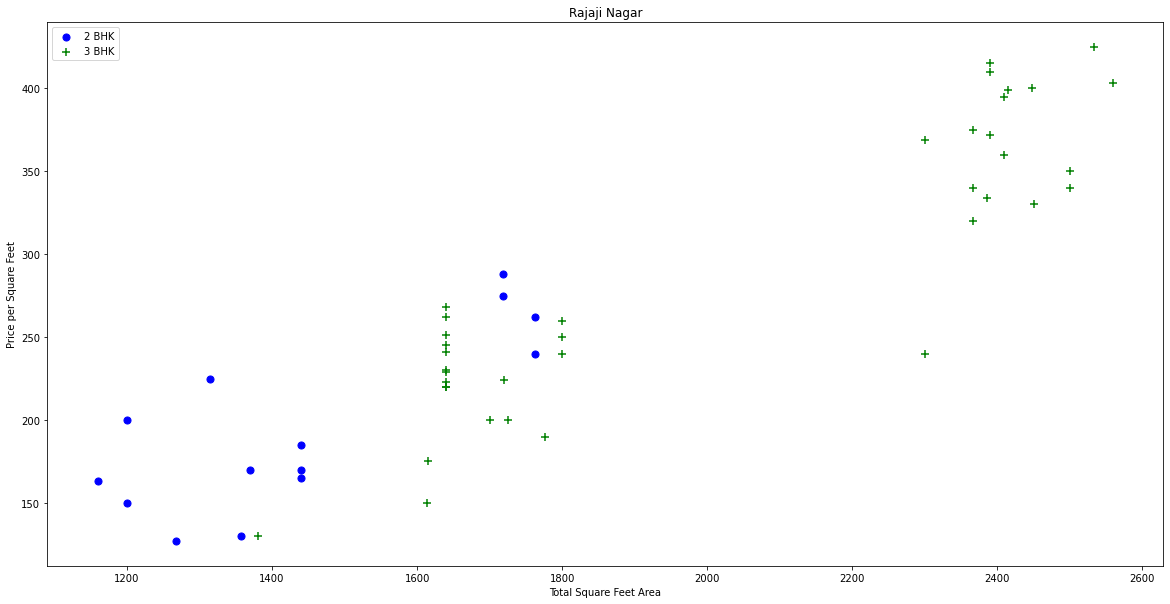

In [46]:
import matplotlib
from matplotlib import pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,c='blue',label='2 BHK',s= 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,c= 'green',label='3 BHK',marker='+',s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data7,'Rajaji Nagar')

## Creating Linear Equation plot which shows Price & Total sqft 

In [47]:
import seaborn as sns
def LinearEquationPlot(data6,location):
    xy = data7[(data6.location==location)]
    fig = plt.figure(figsize=(20,10))
    sns.regplot(x='total_sqft', y='price', data=xy)

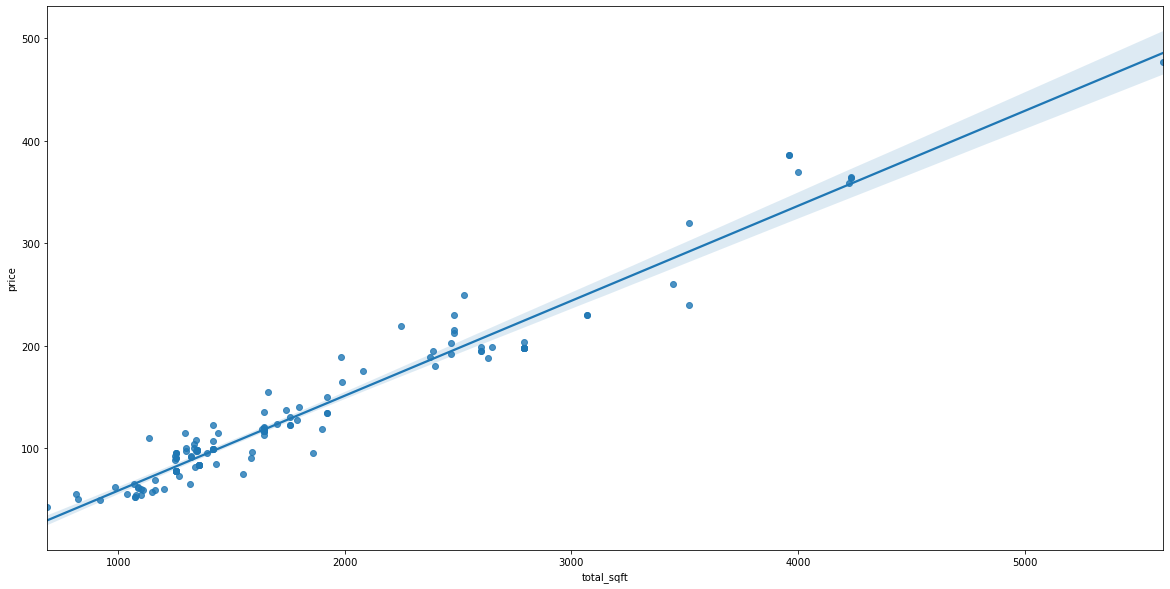

In [48]:
LinearEquationPlot(data7,'Hebbal')

## Creating Function for removing outliner from bhk column

### We can remove those 2 BHK apartment whose price_per_sqft is less than the mean of price_per_sqft of 1 BHK

In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)
data8.shape

(7369, 7)

In [50]:
data8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10213,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10214,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10217,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10218,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


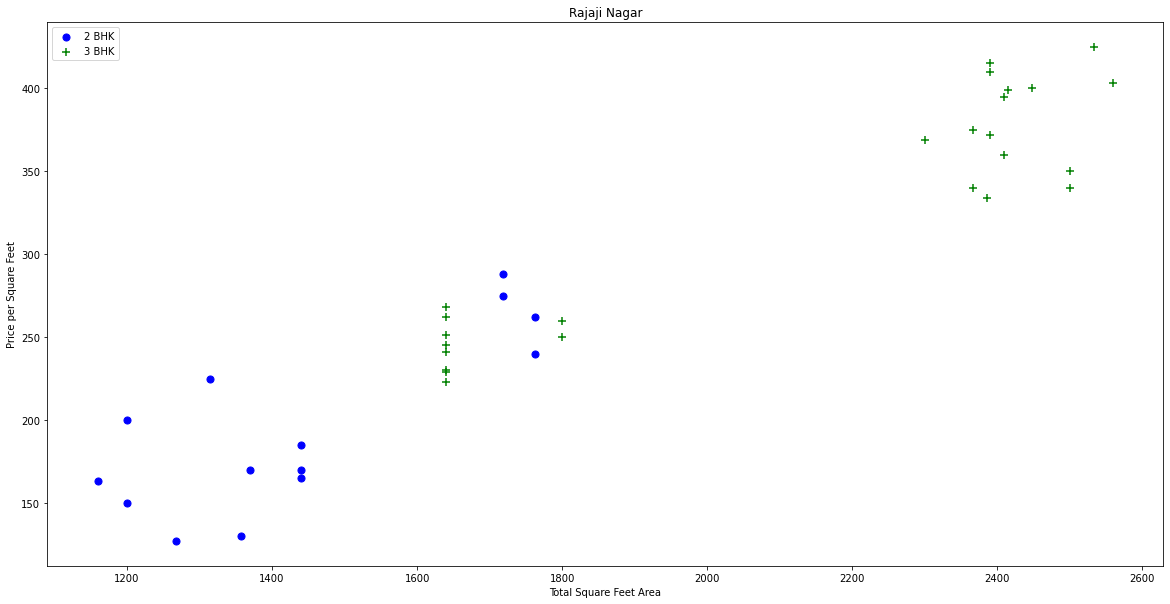

In [51]:
plot_scatter_chart(data8,'Rajaji Nagar')

## Creating Histogram which counts Price per sqft

Text(0, 0.5, 'Count')

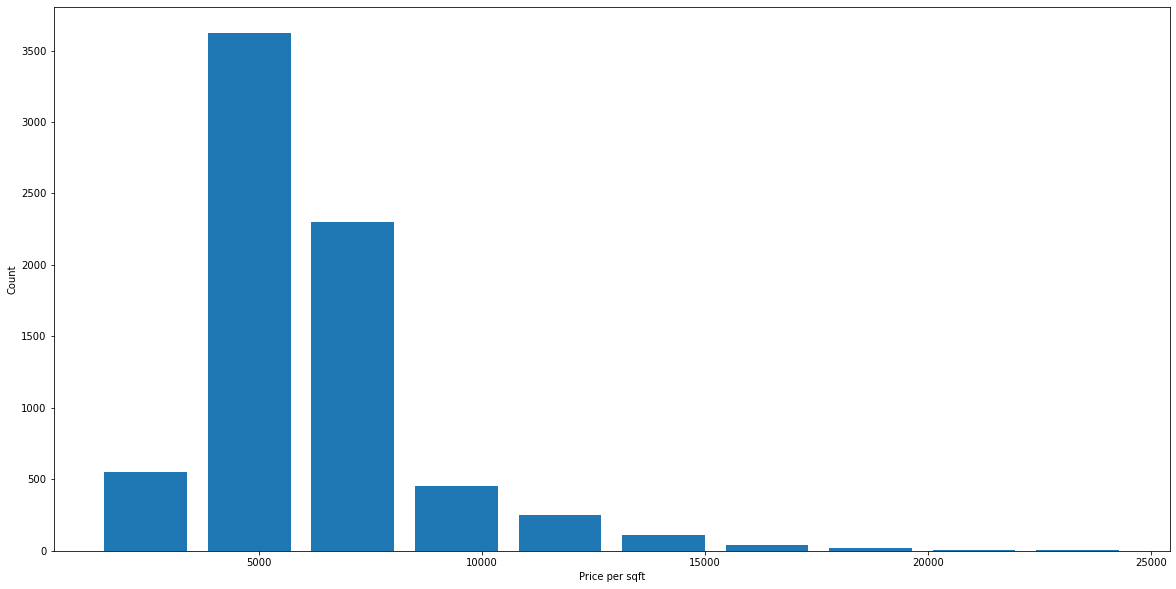

In [52]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

## Creating Heatmap to know Correlation between Data

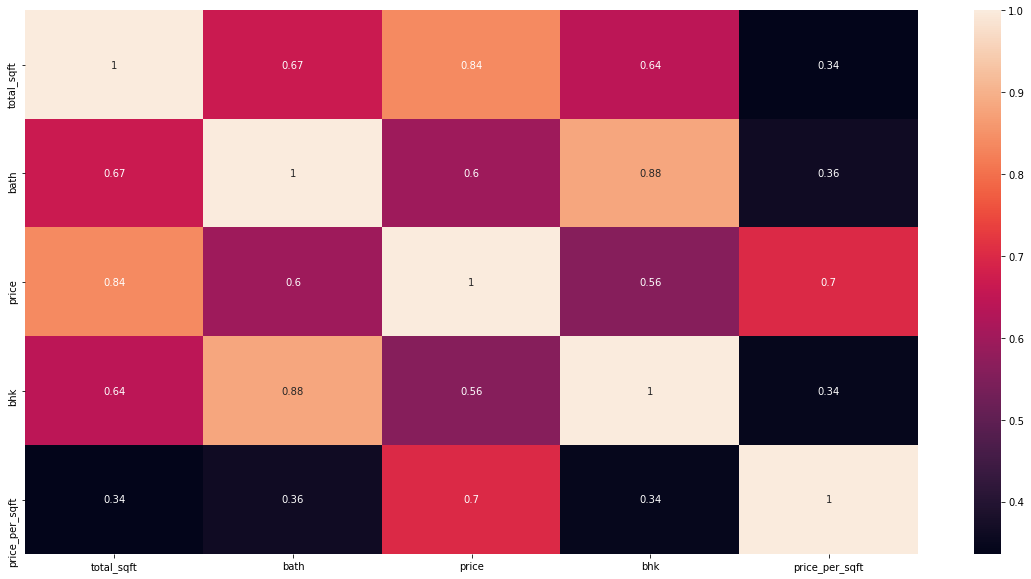

In [53]:
plt.figure(figsize=(20,10))
cor = sns.heatmap(data8.corr(), annot = True)

## Creating PairGrid to know relationship between features

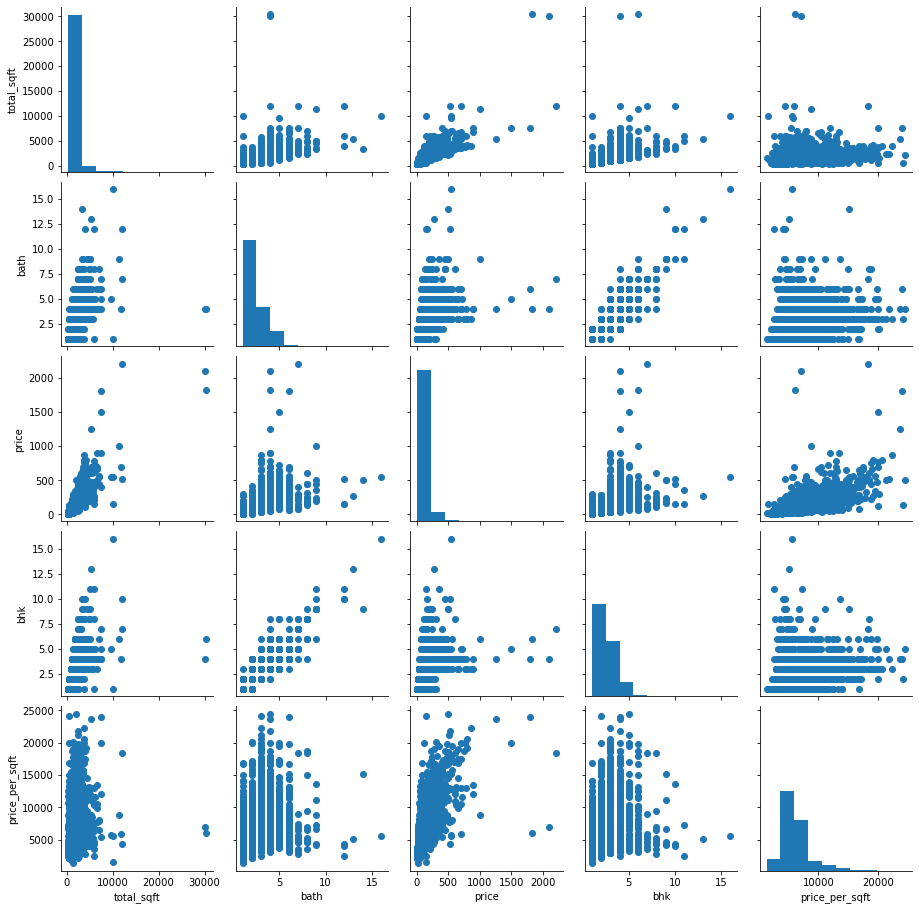

In [54]:
p = sn.PairGrid(data8)
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter);

## Count plot to know no. of bathroom counts

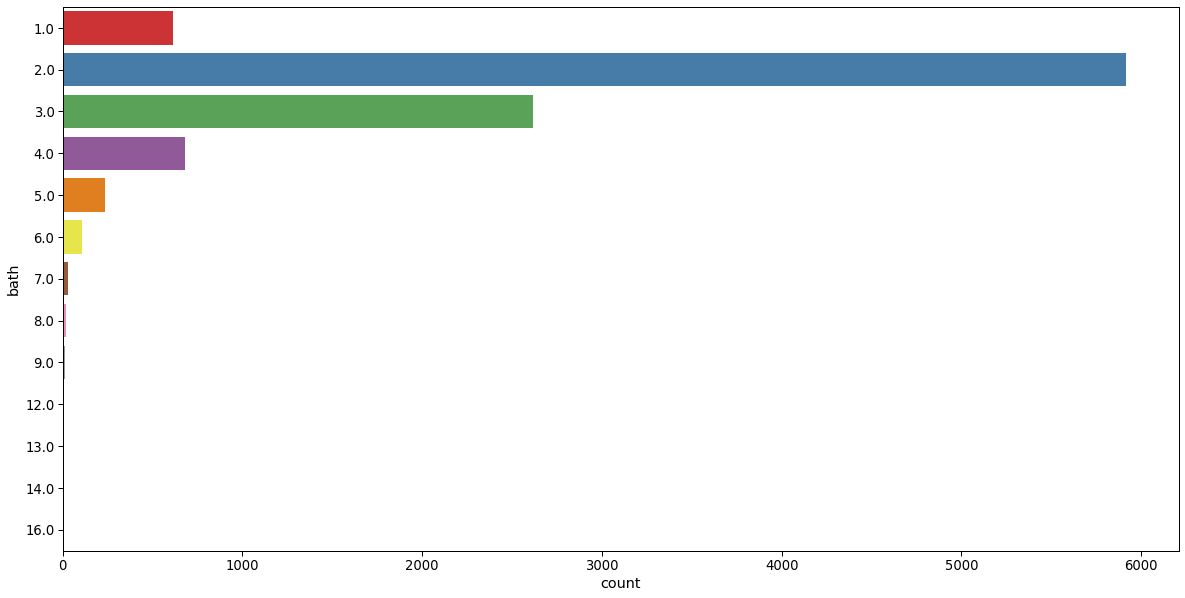

In [55]:
plt.figure(figsize=(20,10))
y = data7['bath']
sn.set_context("paper", 1.5,{"lines.linewidth": 1})
sn.countplot(y=y,label='COUNT',palette= 'Set1')

## Middle class people having 1,2 & 3 bhk flats

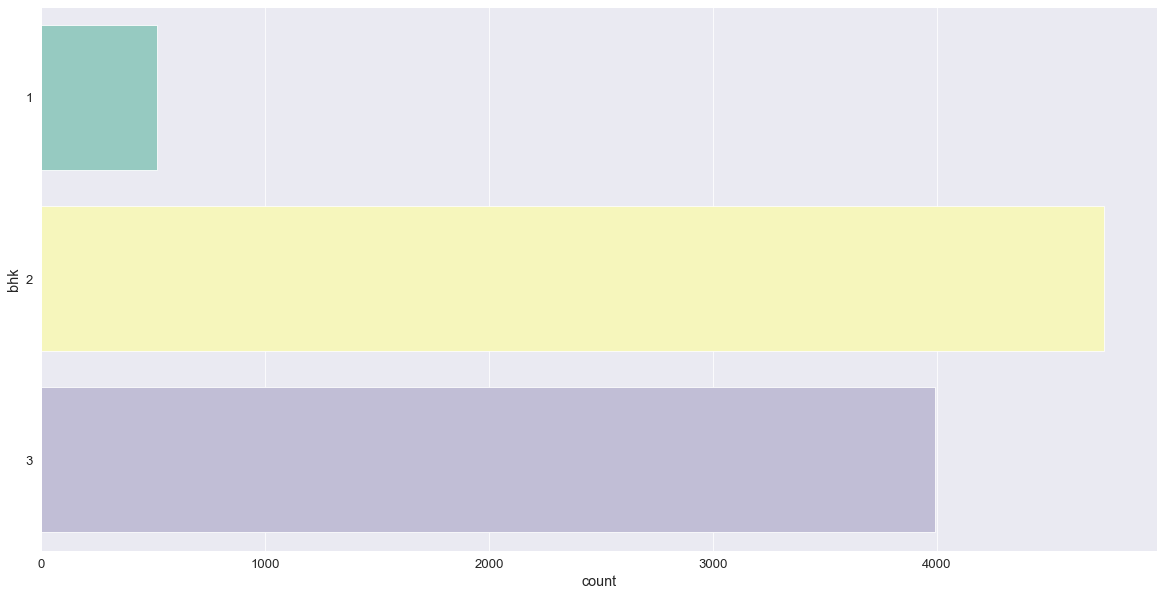

In [56]:
MiddleClass = data7[data7['bhk'] <= 3]['bhk']

plt.figure(figsize=(20,10))
y = MiddleClass
sn.set(style="darkgrid")
sn.set_context("paper", 1.5)
sn.countplot(y=y,label='Count',palette = "Set3")

## Upper middle class people having 4,5 & 6 bhk flats

In [57]:
UpperMiddleClass = data7[data7['bhk'] >= 4 ][data7['bhk'] <= 6]['bhk']
UpperMiddleClass.head()

<ipython-input-57-c78075c3117e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UpperMiddleClass = data7[data7['bhk'] >= 4 ][data7['bhk'] <= 6]['bhk']


0     4
5     4
6     4
9     4
11    4
Name: bhk, dtype: int64

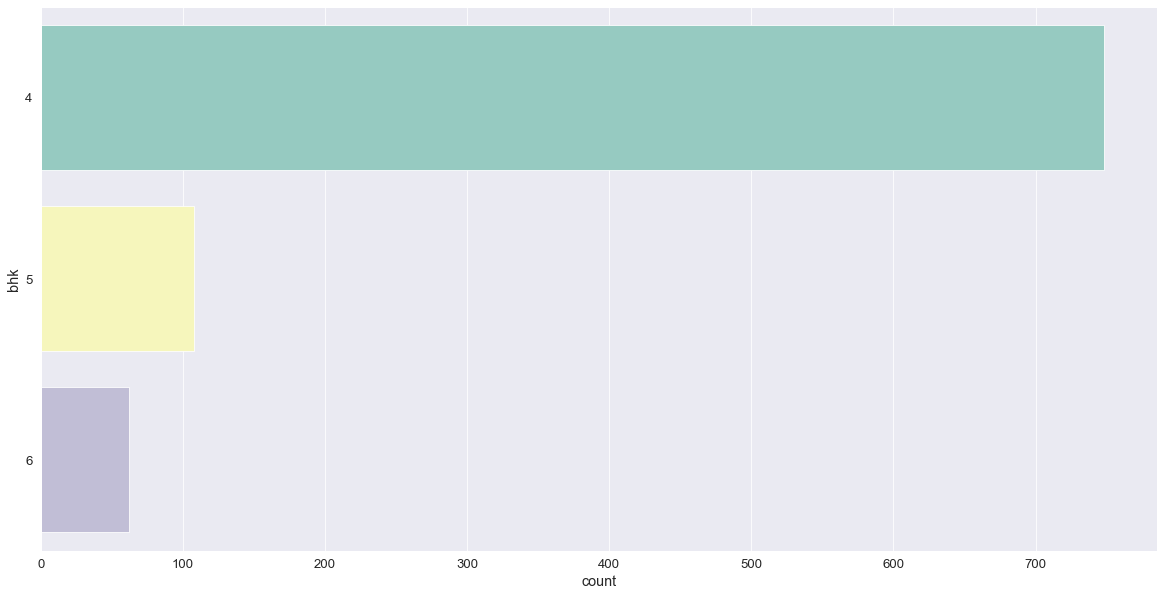

In [58]:
plt.figure(figsize= (20,10))
y = UpperMiddleClass
sn.set(style="darkgrid")
sn.set_context("paper", 1.5)
sn.countplot(y=y,label='Count',palette = "Set3")

## Upper class people having more than 6 bhk flats

In [59]:
UpperClass = data7[data7['bhk'] >= 7 ][data7['bhk'] <= 10]['bhk']
UpperClass

<ipython-input-59-53d9104f6324>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UpperClass = data7[data7['bhk'] >= 7 ][data7['bhk'] <= 10]['bhk']


298       8
585       9
1312      8
1647      8
3069      8
3558      8
3602      7
3816      9
3838      7
4463      8
4573      7
4770      7
4774      7
4777      7
4951      7
5161      9
5344     10
5580      9
5678      8
5727      9
5763      8
5787      8
6874      7
8066      8
8187      7
8200      8
8203      7
8252      7
8321      7
8379      7
8547     10
8680      9
8812      9
9007      8
9039      7
9116      8
9162      8
9281      8
9330      7
9340      7
9456      7
9614     10
9676      9
9759      7
9886      7
9893      8
10195     9
Name: bhk, dtype: int64

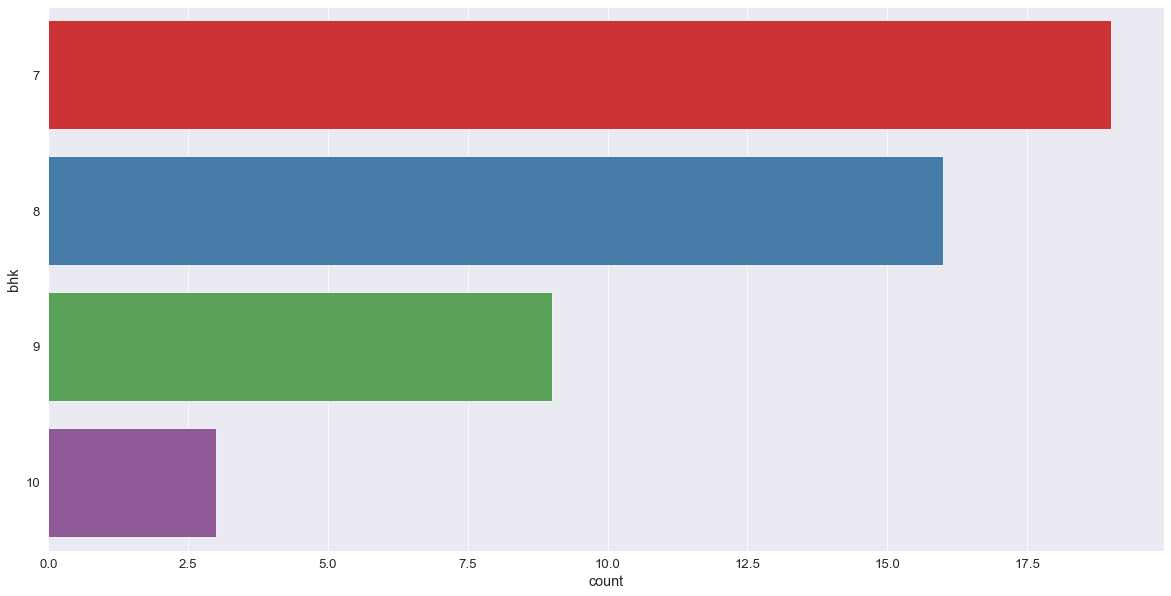

In [60]:
plt.figure(figsize=(20,10))
y = UpperClass
sn.set(style="darkgrid")
sn.set_context("paper", 1.5)
sn.countplot(y=y,label='Count',palette = "Set1")

In [61]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [62]:
data8[data8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9642,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [63]:
data9 = data8[data8.bath < data8.bhk+2]
data9.shape

(7291, 7)

## Converting Location into Numerical for Linear Regression Model

In [64]:
dummies = pd.get_dummies(data9.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data10 = pd.concat([data9,dummies],axis = 'columns')

In [66]:
data10

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,other,2 BHK,1200.0,2.0,70.0,2,5833.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10214,other,1 BHK,1800.0,1.0,200.0,1,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10217,other,2 BHK,1353.0,2.0,110.0,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10218,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
data10 = pd.concat([data9,dummies.drop('other',axis = 'columns')],axis = 'columns')
data10.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data11 = data10.drop('location',axis='columns')

In [69]:
data11.head(3)

,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data11.shape

(7291, 260)

In [71]:
data12 = data11.drop(['size','price_per_sqft'],axis = 'columns')
data12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data12.shape

(7291, 258)

In [73]:
X = data12.drop('price',axis = 'columns')
X.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y = data12.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Implementing Linear Regression Model

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 10)

In [76]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2,random_state = 0)

cross_val_score(LinearRegression(),X,y,cv = cv)

## Creating function with different algorithms to get the best results

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model' : LinearRegression(),
            'params':{
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' :{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter' :['best','random']
            }
        }
    }
    #Storing Results in List scores
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
    })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
find_best_model_using_gridsearchcv(X,y)

## Creating fucntion to Predict Price

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [ ]:
np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]

In [ ]:
X.columns

### Predicting price of "1st Phase JP Nagar" Location with 1000 sqft , 2bhk , 2 Bathrooms

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2)

### Predicting price of "2nd Stage Nagarbhavi" Location with 1000 sqft , 2bhk , 2 Bathrooms

In [ ]:
predict_price('2nd Stage Nagarbhavi',1000,2,2)

In [ ]:
predict_price('Yeshwanthpur',1000,5,4)